In [251]:
#Dependencies
import pandas as pd
import tweepy
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [252]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [253]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [254]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [255]:
# Target Search Terms
target_user = ('@FoxNews', '@CBSNews', 'BBCNews', '@CNN', '@nytimesworld')

In [256]:
# Array to hold sentiments
sentiments = []

In [257]:
# Convert tweet timestamps to datetime objects that can be manipulated by Python
converted_timestamps = []

In [258]:
# Variables for holding sentiments
compound_list = []

In [259]:
# Counter
counter = 1

In [260]:
# Loop through all target users
for target in target_user:
    # Variable for holding the oldest tweet
    oldest_tweet = None
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target, count=100, result_type="recent", max_id=oldest_tweet)
    # Loop through all tweets
    for tweet in public_tweets:
            
        #Convert the raw tweet time to correct datetime stamp.
        converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
    
        # Add sentiments for each tweet into an array
        sentiments.append({"News Source": target,
                       "Date/Time": converted_time, 
                        "Compound": compound,
                        "Positive": pos,
                        "Neutral": neu,
                        "Negative": neg,
                        "Tweet": tweet["text"],
                        "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [261]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date/Time,Negative,Neutral,News Source,Positive,Tweet,Tweets Ago
0,-0.3612,2017-12-03 03:23:02+00:00,0.185,0.815,@FoxNews,0.0,"Trump compares Flynn to Hillary, asks 'rigged ...",1
1,-0.2960,2017-12-03 03:17:02+00:00,0.104,0.896,@FoxNews,0.0,"On ""The Cost of Freedom,"" @RepDeSantis gave hi...",2
2,0.0000,2017-12-03 03:16:01+00:00,0.000,1.000,@FoxNews,0.0,"On @ffweekend, @SheriffClarke gave his take on...",3
3,-0.4767,2017-12-03 03:14:08+00:00,0.147,0.853,@FoxNews,0.0,".@dbongino on Michael Flynn: ""It's only Republ...",4
4,-0.4215,2017-12-03 03:02:30+00:00,0.141,0.859,@FoxNews,0.0,.@ChristopherHahn on Michael Flynn guilty plea...,5


In [262]:
sentiments_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Compound       500 non-null float64
Date/Time      500 non-null datetime64[ns, UTC]
Negative       500 non-null float64
Neutral        500 non-null float64
News Source    500 non-null object
Positive       500 non-null float64
Tweet          500 non-null object
Tweets Ago     500 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2)
memory usage: 31.3+ KB


In [263]:
# Build a scatter plot for each data type
plt.scatter(sentiments_pd["Tweets Ago"], 
            sentiments_pd["Compound"],
            edgecolor="black", linewidths=1, marker="o", 
            s=100, alpha=0.8)

In [264]:
# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.xlim([0, 100])
plt.ylim([-1, 1])

(-1, 1)

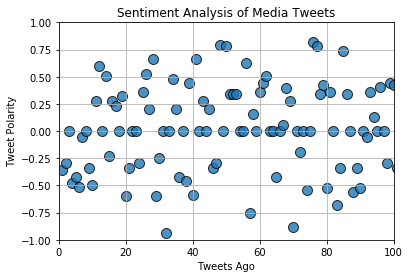

In [265]:
# Save the figure
#plt.savefig("Sentiment_Analysis_of_Media_Tweets.png")

# Show plot
plt.show()

In [266]:
sentiments_source_grouped = sentiments_pd.groupby(["News Source"], as_index='False')
sentiments_source_grouped_summary = sentiments_source_grouped["Compound"].sum().reset_index('News Source')
x_axis = np.arange(len(sentiments_source_grouped_summary["News Source"]))

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["CBS News", "CNN", "Fox News", "NY Times", "BBC News"])
sentiments_source_grouped_summary.head()

,News Source,Compound
0,@CBSNews,-17.5436
1,@CNN,-9.5177
2,@FoxNews,2.7647
3,@nytimesworld,-16.8846
4,BBCNews,-6.4050


In [267]:
plt.bar(x_axis, sentiments_source_grouped_summary["Compound"], color='r', alpha=0.5, align="edge")

<Container object of 5 artists>

In [268]:
# Give our chart some labels and a tile
plt.title("Aggregate Media Sentiment baed on Twitter")
plt.ylabel("Tweet Polarity")

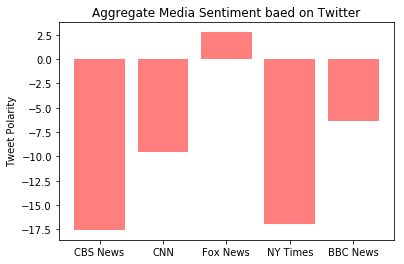

In [269]:
plt.show()